# Klasifikasi Komentar Instagram mengenai Sentiment Cyber Bulying Menggunakan Metode TF-IDF dan Nevie Bayes

# Install dan Import Library

In [67]:
!pip install pandas matplotlib
!pip install scikit-learn

In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [69]:
!pip uninstall scipy

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.7.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-8b9e111f.3.17.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.7.3


In [70]:
!pip install scipy==1.7.3

  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
jax 0.4.20 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
jaxlib 0.4.20+cuda11.cudnn86 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Pra-pemrosesan Teks

In [3]:
# Membaca data dari file CSV
data = pd.read_csv('/content/dataset_komentar_instagram_cyberbullying.csv')

# Preprocessing: menghapus tautan, karakter khusus, dan tanda baca yang tidak diperlukan
data['Instagram Comment Text'] = data['Instagram Comment Text'].apply(lambda x: re.sub(r'http\S+', '', x))  # Menghapus tautan
data['Instagram Comment Text'] = data['Instagram Comment Text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))  # Menghapus karakter khusus dan tanda baca
data['Instagram Comment Text'] = data['Instagram Comment Text'].apply(lambda x: re.sub(r'USERNAME ', '', x))
data['Instagram Comment Text'] = data['Instagram Comment Text'].apply(lambda x: re.sub(r' USERNAME', '', x))
# Menampilkan lima baris pertama dari data yang sudah dipreprocessing
print(data.head())

   Id Sentiment                             Instagram Comment Text
0   1  negative   TOLOL Gak ada hubungan nya keguguran dgn pake...
1   2  negative  Geblek lo tatacowo bgt dibela2in balikanhadeww...
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...
3   4  negative  Intinya kalau kesel dengan ATT nya gausah ke a...
4   5  negative  hadewwwww permpuan itu lgsakit jiwaknp harus d...


# Visualisasi Data

   Id Sentiment                             Instagram Comment Text
0   1  negative   TOLOL Gak ada hubungan nya keguguran dgn pake...
1   2  negative  Geblek lo tatacowo bgt dibela2in balikanhadeww...
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...
3   4  negative  Intinya kalau kesel dengan ATT nya gausah ke a...
4   5  negative  hadewwwww permpuan itu lgsakit jiwaknp harus d...


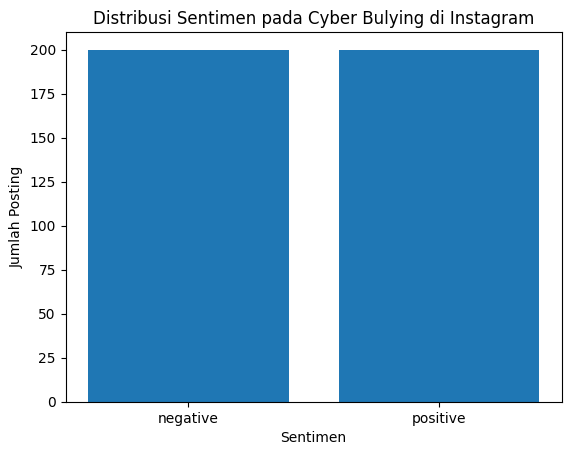

In [4]:

# Menampilkan lima baris pertama dari data
print(data.head())

# Menghitung jumlah tweet dalam setiap kategori sentimen
sentimen_count = data['Sentiment'].value_counts()

# Visualisasi data
plt.bar(sentimen_count.index, sentimen_count.values)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Posting')
plt.title('Distribusi Sentimen pada Cyber Bulying di Instagram')
plt.show()


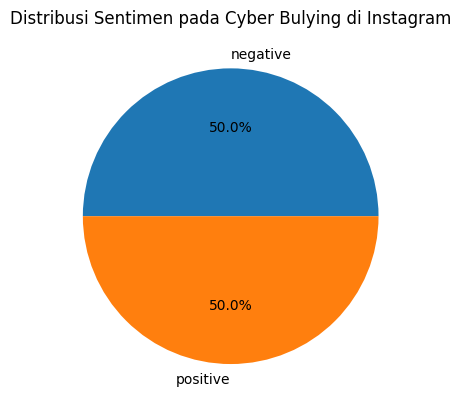

In [5]:
# Visualisasi dengan pie chart
plt.pie(sentimen_count.values, labels=sentimen_count.index, autopct='%1.1f%%')
plt.title('Distribusi Sentimen pada Cyber Bulying di Instagram')
plt.show()

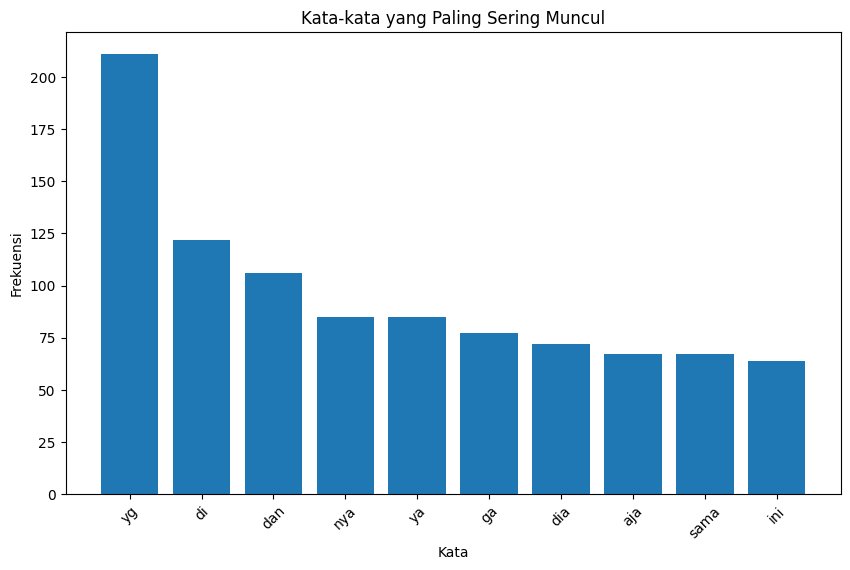

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


# Inisialisasi objek CountVectorizer
count_vectorizer = CountVectorizer()

# Ekstraksi fitur dengan metode CountVectorizer
X_count = count_vectorizer.fit_transform(data['Instagram Comment Text'])

# Mengambil daftar fitur kata-kata
feature_names = count_vectorizer.get_feature_names_out()

# Menghitung frekuensi kemunculan kata-kata
word_freq = list(zip(feature_names, X_count.toarray().sum(axis=0)))

# Mengurutkan kata-kata berdasarkan frekuensi kemunculan secara menurun
sorted_word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Mengambil 10 kata paling sering muncul
top_words = sorted_word_freq[:10]

# Membuat DataFrame untuk kata-kata yang paling sering muncul
df_top_words = pd.DataFrame(top_words, columns=['Kata', 'Frekuensi'])

# Membuat grafik kata-kata yang paling sering muncul
plt.figure(figsize=(10, 6))
plt.bar(df_top_words['Kata'], df_top_words['Frekuensi'])
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata yang Paling Sering Muncul')
plt.xticks(rotation=45)
plt.show()


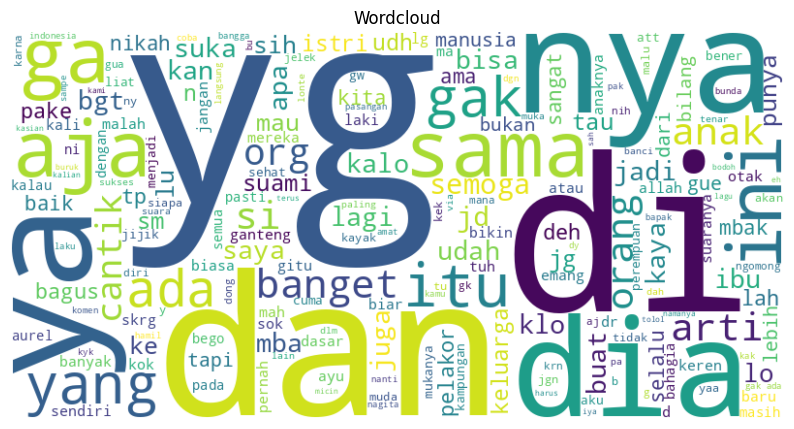

In [7]:
from wordcloud import WordCloud

# Menggabungkan semua tweet menjadi satu teks
all_tweets = ' '.join(data['Instagram Comment Text'].str.lower())

# Inisialisasi objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud')
plt.show()


In [8]:
# Menghitung panjang teks tweet
data['panjang_posting'] = data['Instagram Comment Text'].apply(len)
print(data.head())

   Id Sentiment                             Instagram Comment Text  \
0   1  negative   TOLOL Gak ada hubungan nya keguguran dgn pake...   
1   2  negative  Geblek lo tatacowo bgt dibela2in balikanhadeww...   
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...   
3   4  negative  Intinya kalau kesel dengan ATT nya gausah ke a...   
4   5  negative  hadewwwww permpuan itu lgsakit jiwaknp harus d...   

   panjang_posting  
0              194  
1              103  
2              140  
3              355  
4              117  


# Ekstraksi Fitur dengan TF-IDF

In [9]:
data['Sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

X = data['Instagram Comment Text'].str.lower()
le = LabelEncoder()
le.fit(['negative', 'positive'])

print(list(le.classes_))
y = le.transform(data['Sentiment'])

#y = tweets.iloc[:, 1].values
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['negative', 'positive']
(400,)
 tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar
(400,)
0


In [11]:
import pickle
output = open('encoder_cyberbulying.pkl', 'wb')
pickle.dump(le, output)
output.close()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.5, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(X).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import pickle
pickle.dump(tfidfconverter, open("vectorizer_cyberbulying.pickle", "wb"))

# Pembagian Data

In [14]:
# Pembagian data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada setiap set
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

Jumlah data pelatihan: 320
Jumlah data pengujian: 80


# Klasfikasi menggunakan metode Nivie Bayes

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisialisasi objek Naive Bayes
naive_bayes = MultinomialNB()

# Melatih model menggunakan data pelatihan
naive_bayes.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = naive_bayes.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))


Akurasi: 87.50%


In [16]:
filename = 'model_cyberbulying_classification.sav'
pickle.dump(naive_bayes, open(filename, 'wb'))

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menghitung presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision * 100))

# Menghitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: {:.2f}%".format(recall * 100))

# Menghitung F1-Score
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1-Score: {:.2f}%".format(f1score * 100))


Presisi: 87.50%
Recall: 87.50%
F1-Score: 87.50%


In [18]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[35  5]
 [ 5 35]]


In [19]:
from sklearn.metrics import recall_score

# Menghitung recall untuk label 'positive'
recall_positive = recall_score(y_test, y_pred, pos_label=1)
print("Recall (Positive):", recall_positive)

# Menghitung recall untuk label 'negative'
recall_negative = recall_score(y_test, y_pred, pos_label=0)
print("Recall (Negative):", recall_negative)


Recall (Positive): 0.875
Recall (Negative): 0.875


In [20]:
# Evaluasi kinerja model
report = classification_report(y_test, y_pred)

print("Hasil Prediksi Sentimen pada Dataset:")
print(report)


Hasil Prediksi Sentimen pada Dataset:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.88      0.88      0.88        40

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.88      0.88      0.88        80



In [23]:
modelname = 'model_cyberbulying_classification.sav'
loaded_model = pickle.load(open(modelname, 'rb'))

vec_path = '/content/vectorizer_cyberbulying.pickle'
tfidf_file = open(vec_path, 'rb')
tfidfconverter = pickle.load(tfidf_file)
tfidf_file.close()

text_vector = tfidfconverter.transform(["Lu ganteng banget"]).toarray()
pred_text = loaded_model.predict(text_vector)

pkl_file = open('/content/encoder_cyberbulying.pkl', 'rb')
le = pickle.load(pkl_file)
pkl_file.close()

pred_text = le.inverse_transform(pred_text)
score = round(max(loaded_model.predict_proba(text_vector)[0])*100,2)
result = str(pred_text[0].capitalize())

print(result)
print(score)

Positive
54.84
